# Notebook for generating draft volcanostratigraphy columns for the Cardenas Basalts

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from pystrat import pystrat
import seaborn as sns
%config InlineBackend.figure_format='retina'

## import strat data

In [16]:
Nankoweap_Canyon_data = pd.read_csv('../data/strat/Nankoweap_Canyon_strat.csv')
Lava_Chuar_data = pd.read_csv('../data/strat/Lava_Chuar_strat.csv')
Basalt_Canyon_data = pd.read_csv('../data/strat/Basalt_Canyon_strat.csv')

Nankoweap_sample_strat = pd.read_csv('../data/strat/Nankoweap_sample_strat.csv')
Lava_Chuar_sample_strat = pd.read_csv('../data/strat/Lava_Chuar_sample_strat.csv')
Basalt_Canyon_sample_strat = pd.read_csv('../data/strat/Basalt_Canyon_sample_strat.csv')

display(Nankoweap_Canyon_data.head())
display(Lava_Chuar_data.head())
display(Basalt_Canyon_data.head())

,thickness,grain size,lithology,structure
0,4.0,C,basalt,NaN
1,11.4,C,basalt,vesicles
2,4.7,M,vesicular basalt,many vesicles; flow top
3,2.7,C,basalt,NaN
4,10.5,C,basalt,NaN


,thickness,grain size,lithology,structure
0,2.0,C,basalt,NaN
1,12.0,C,basalt,NaN
2,2.7,M,vesicular basalt,many vesicles
3,0.5,F,sandstone,flow top
4,4.2,C,basalt,NaN


,thickness,grain size,lithology,structure
0,2.0,VF,sandstone,NaN
1,0.3,F,sandstone,ripple
2,0.7,cover,cover,NaN
3,1.8,VF,sandstone,NaN
4,0.8,C,basalt,NaN


## set up color and width legend charts

In [17]:
lithology = ['basalt', 'vesicular basalt', 'cover', 'sandstone', 'volcaniclastic']
color = ['darkgrey', 'darkgrey', 'white', 'indianred', 'tan']
color_chart = pd.Series(index=lithology, data = color)
color_chart

basalt               darkgrey
vesicular basalt     darkgrey
cover                   white
sandstone           indianred
volcaniclastic            tan
dtype: object

In [18]:
grain_size = ['cover', 'VF', 'F', 'M', 'C']
widths = [0.0, 0.25, 0.5, 0.75, 1.0]
width_chart = pd.Series(index=grain_size, data = widths)
width_chart

cover    0.00
VF       0.25
F        0.50
M        0.75
C        1.00
dtype: float64

## make color and width references in tables

In [19]:
Nankoweap_Canyon_data['color'] = [color_chart[i] for i in Nankoweap_Canyon_data['lithology']]
Nankoweap_Canyon_data['width'] = [width_chart[i] for i in Nankoweap_Canyon_data['grain size']]

Lava_Chuar_data['color'] = [color_chart[i] for i in Lava_Chuar_data['lithology']]
Lava_Chuar_data['width'] = [width_chart[i] for i in Lava_Chuar_data['grain size']]

Basalt_Canyon_data['color'] = [color_chart[i] for i in Basalt_Canyon_data['lithology']]
Basalt_Canyon_data['width'] = [width_chart[i] for i in Basalt_Canyon_data['grain size']]

## Nankoweap Canyon strat

In [20]:
# create a pystrat Section from the lithostratigraphy data
Nankoweap_section = pystrat.Section(Nankoweap_Canyon_data['thickness'], Nankoweap_Canyon_data['lithology'])

# create a pystrat Style from the styling files
Nankoweap_style = pystrat.Style('facies',Nankoweap_Canyon_data['lithology'],Nankoweap_Canyon_data['color'],
                         'facies',Nankoweap_Canyon_data['lithology'],Nankoweap_Canyon_data['width'],
                          0.1, 2)

/Users/yimingzhang/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1376: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


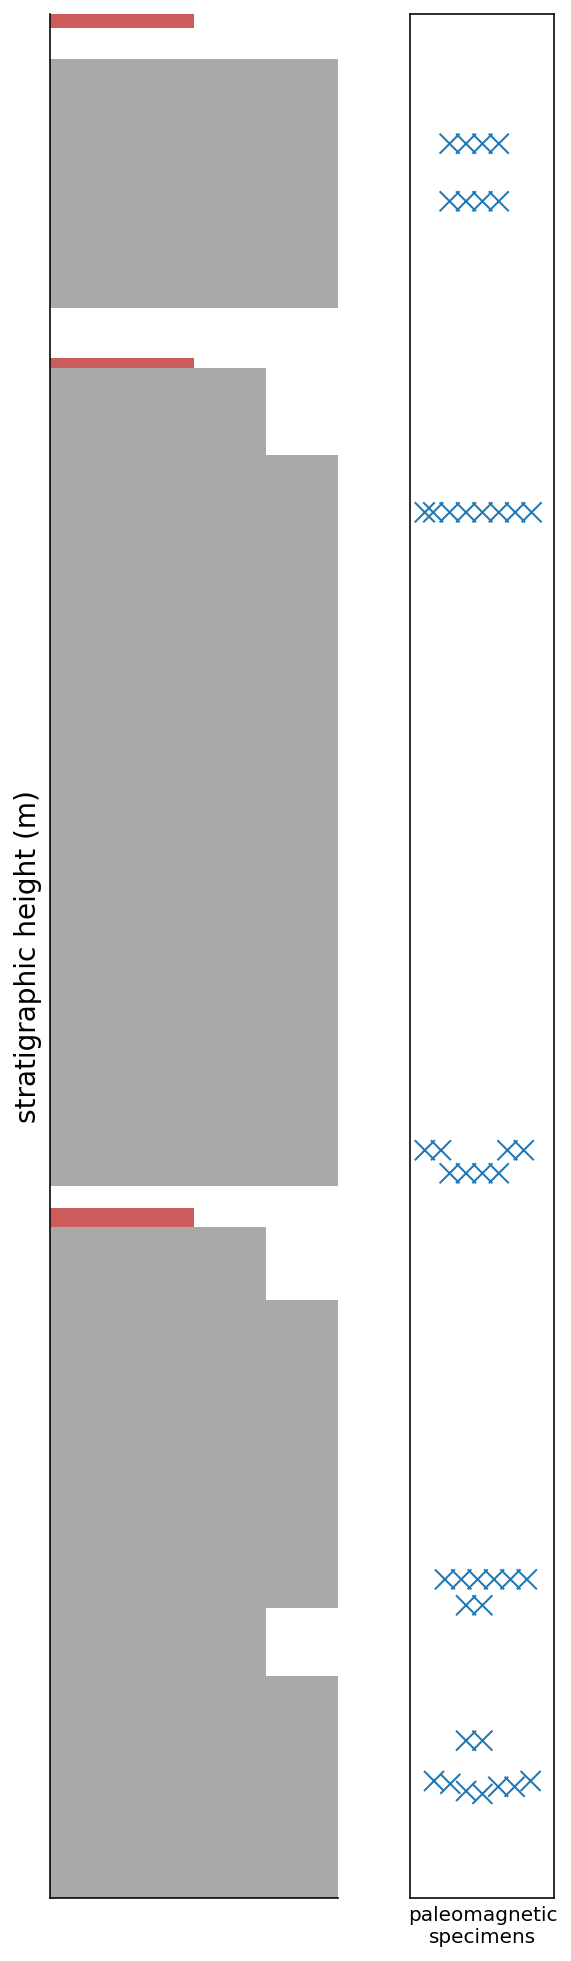

In [29]:
fig, ax = pystrat.plot_stratigraphy(Nankoweap_section, Nankoweap_style, ncols = 2, linewidth=0., col_widths=0.5)

ax[0].set_xticks([])
ax[0].set_xticklabels([])
ax[0].set_yticks([0,20,40,60,80,100,120])
ax[0].set_yticklabels(labels=['0','20','40','60','80','100','120'], fontdict={'size':14})
ax[0].grid(False)
ax[0].set_ylabel('stratigraphic height (m)', fontdict={'size':14})

sns.swarmplot(y = Nankoweap_sample_strat['strat_level'], marker='x', s=10, edgecolor='k', linewidth=1, ax = ax[1])

ax[1].set_xlabel('paleomagnetic\nspecimens')
ax[1].set_ylabel('')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].grid(False)

plt.savefig('code_output/Nankoweap_strat.pdf', bbox_inches='tight')
plt.show()

## Lava Chuar strat

In [22]:
# create a pystrat Section from the lithostratigraphy data
Lava_Chuar_section = pystrat.Section(Lava_Chuar_data['thickness'], Lava_Chuar_data['lithology'])

# create a pystrat Style from the styling files
Lava_Chuar_style = pystrat.Style('facies',Lava_Chuar_data['lithology'],Lava_Chuar_data['color'],
                         'facies',Lava_Chuar_data['lithology'],Lava_Chuar_data['width'],
                          0.1, 2)

/Users/yimingzhang/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1376: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


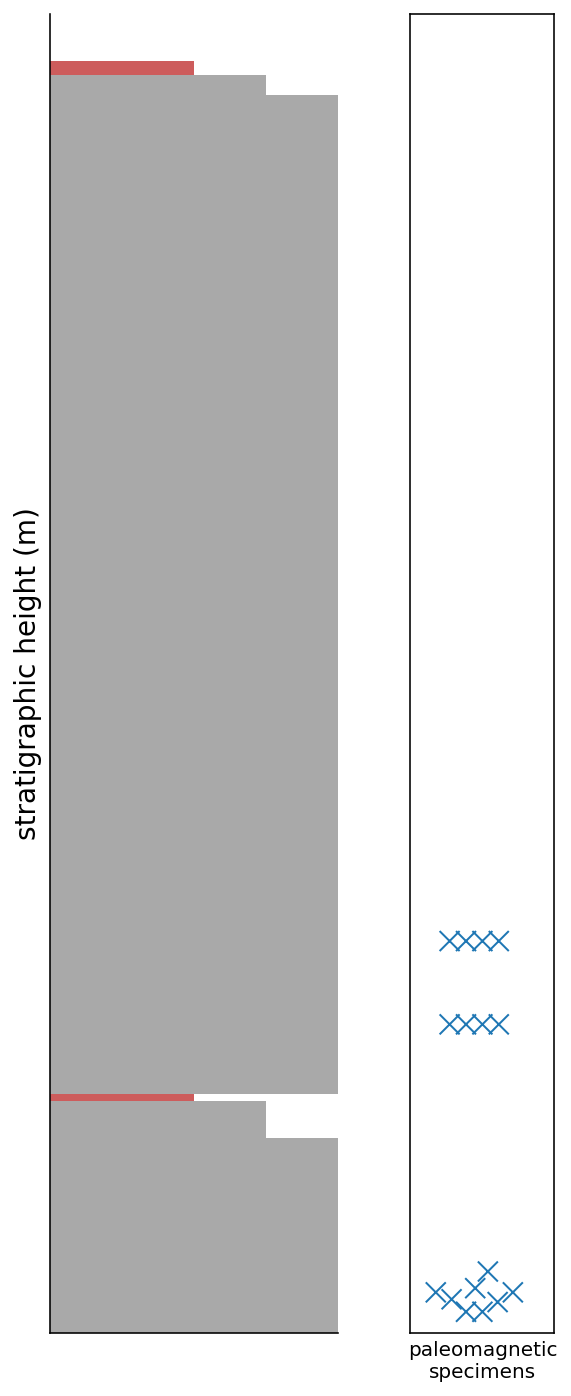

In [26]:
fig, ax = pystrat.plot_stratigraphy(Lava_Chuar_section, Lava_Chuar_style, ncols = 2, linewidth=0., col_widths=0.5)

ax[0].set_xticks([])
ax[0].set_xticklabels([])
ax[0].set_yticks([0,20,40,60,80,95])
ax[0].set_yticklabels(labels=['0','20','40','60','80','95'], fontdict={'size':14})
ax[0].grid(False)
ax[0].set_ylabel('stratigraphic height (m)', fontdict={'size':14})

sns.swarmplot(y = Lava_Chuar_sample_strat['strat_level'], marker='x', s=10, edgecolor='k', linewidth=1, ax = ax[1])

ax[1].set_xlabel('paleomagnetic\nspecimens')
ax[1].set_ylabel('')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].grid(False)
plt.savefig('code_output/Lava_Chuar_strat.pdf', bbox_inches='tight')
plt.show()

## Basalt Canyon strat

In [24]:
# create a pystrat Section from the lithostratigraphy data
Basalt_Canyon_section = pystrat.Section(Basalt_Canyon_data['thickness'], Basalt_Canyon_data['lithology'])

# create a pystrat Style from the styling files
Basalt_Canyon_style = pystrat.Style('facies',Basalt_Canyon_data['lithology'],Basalt_Canyon_data['color'],
                         'facies',Basalt_Canyon_data['lithology'],Basalt_Canyon_data['width'],
                          0.05, 2)

/Users/yimingzhang/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1376: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)
/Users/yimingzhang/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


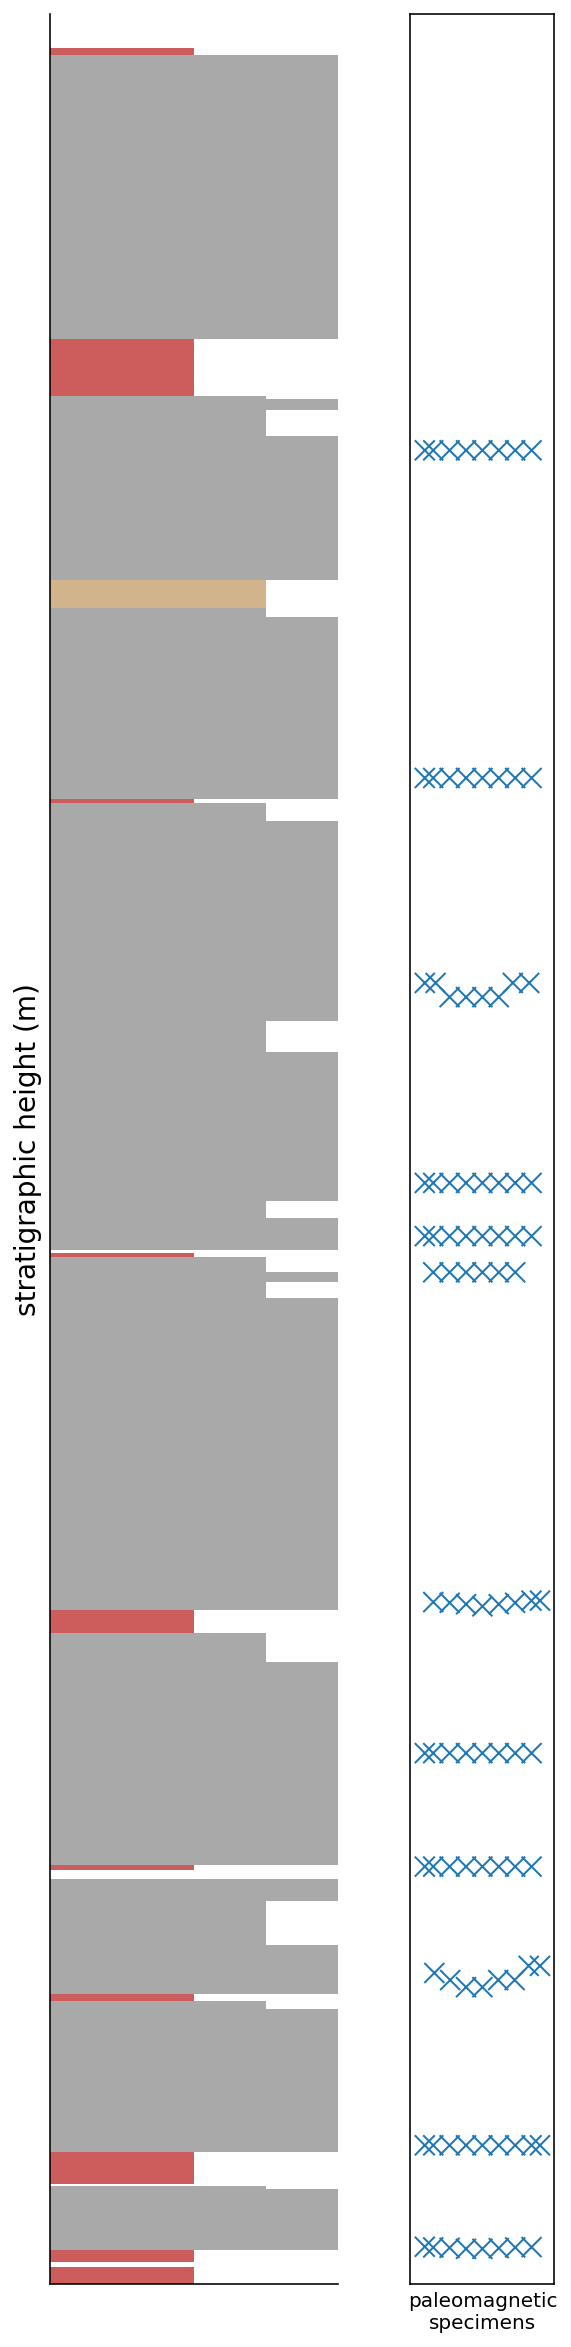

In [27]:
fig, ax = pystrat.plot_stratigraphy(Basalt_Canyon_section, Basalt_Canyon_style, ncols = 2, linewidth=0., col_widths=0.5)

ax[0].set_xticks([])
ax[0].set_xticklabels([])
ax[0].set_yticks([0,40,80,120,160,200,240,280,320])
ax[0].set_yticklabels(labels=['0','40','80','120','160','200','240','280','320'], fontdict={'size':14})
ax[0].grid(False)
ax[0].set_ylabel('stratigraphic height (m)', fontdict={'size':14})

sns.swarmplot(y = Basalt_Canyon_sample_strat['strat_level'], marker='x', s=10, edgecolor='k', linewidth=1, ax = ax[1])

ax[1].set_xlabel('paleomagnetic\nspecimens')
ax[1].set_ylabel('')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].grid(False)
plt.savefig('code_output/Basalt_Canyon_strat.pdf', bbox_inches='tight')
plt.show()